In [2]:
import cv2 as cv
import numpy as np
import os
from skimage import data
import mahotas as mt
import imutils
import matplotlib.pyplot as plt

In [3]:
def load_images(data_dir):
    #two lists, labels and images
    images = []
    
    file_names = [os.path.join(data_dir, f)
                for f in os.listdir(data_dir)
                if f.endswith(".jpg")]
    for f in file_names:
        images.append(cv.imread(f))
    return images

In [4]:
path_ref = "/home/fahd/INDEXATION/TP1_IDM/imgColor/ref"
images_ref = load_images(path_ref)

path_test = "/home/fahd/INDEXATION/TP1_IDM/imgColor/test"
images_test = load_images(path_test)

In [5]:
def display_images(images):
    fig=plt.figure(figsize=(20,10))
    for i in range(len(images)):
        fig.add_subplot(1,len(images),i+1)
        plt.axis('off')
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
        plt.show() 

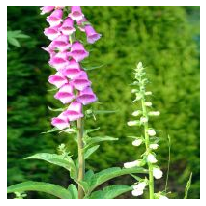

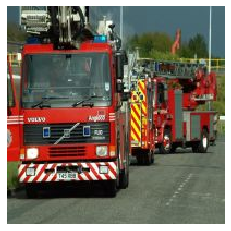

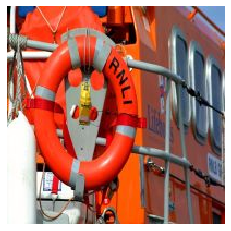

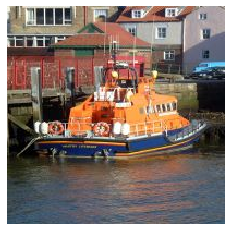

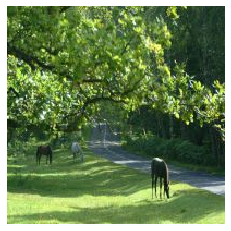

In [6]:
display_images(images_ref)

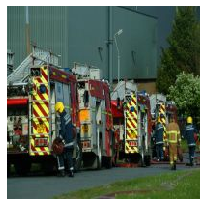

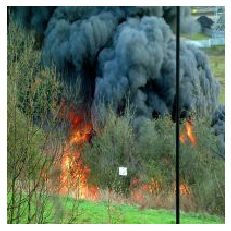

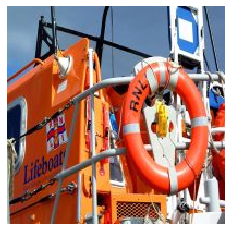

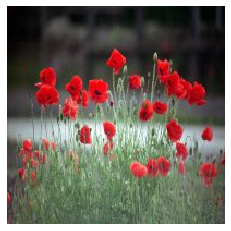

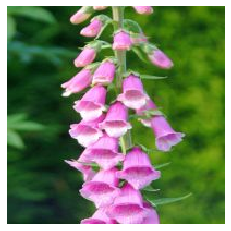

In [7]:
display_images(images_test)

In [8]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    hist = cv.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    if imutils.is_cv2():
        hist = cv.normalize(hist)
    else:
        cv.normalize(hist, hist)
    return hist.flatten() 

In [9]:
def hist(img, histSize = 256, histRange = (0, 256), accumulate = False):
        bgr_planes = cv.split(img)
        b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate = accumulate)
        g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate = accumulate)
        r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate = accumulate)
    
        return np.array([b_hist, g_hist, r_hist])

In [10]:
index ={}
histo_ref = {}
for i in range(len(images_ref)): 
    index[i] = extract_color_histogram(images_ref[i])
    histo_ref[i] = hist(images_ref[i])

In [11]:
def dist(histo1, histo2):
    return 1-np.sum(np.minimum(histo1, histo2))/np.minimum(np.sum(histo1), np.sum(histo2))

In [12]:
results = dict.fromkeys(list(histo_ref.keys()) , 0)
q=input('tap the number of query image 0 to 4 : ')
q=int(q)
hist_q=extract_color_histogram(images_test[q])
for (k, hist) in index.items():
    results[k] = cv.compareHist(hist_q,hist, cv.HISTCMP_INTERSECT)
results = sorted([(v, k) for (k, v) in results.items()], reverse = False) 

tap the number of query image 0 to 4 : 2


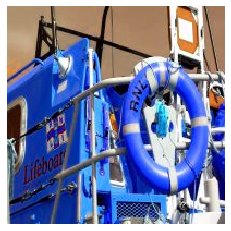

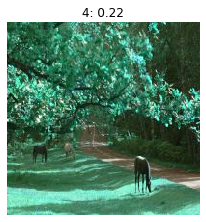

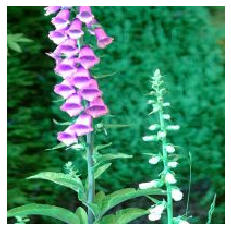

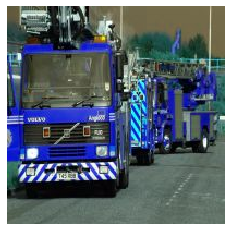

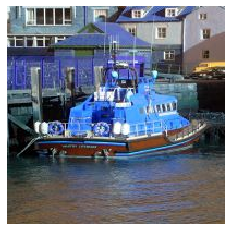

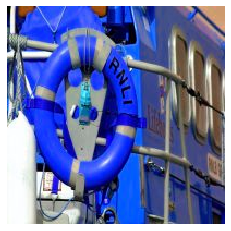

In [13]:
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images_test[q])
plt.axis("off")
fig = plt.figure(figsize=(20,10))
for (i, (v, k)) in enumerate(results):
    ax = fig.add_subplot(1, len(images_ref), i + 1)
    ax.set_title("%s: %.2f" % (k, v))
    plt.imshow(images_ref[k])
    plt.axis("off")
    plt.show() 

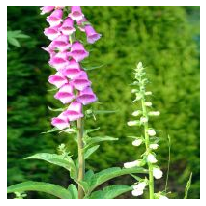

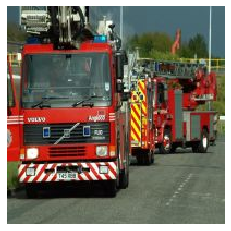

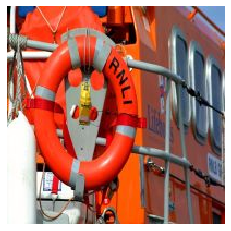

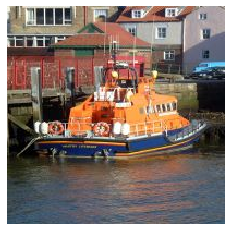

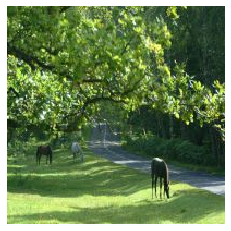

In [14]:
display_images(images_ref)

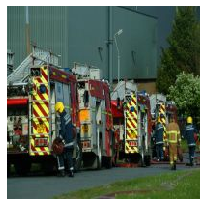

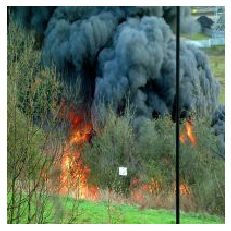

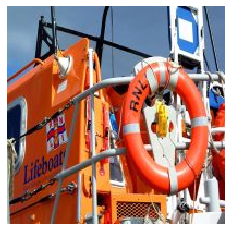

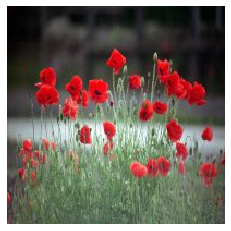

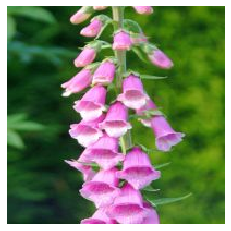

In [15]:
display_images(images_test)

In [16]:
def convert_Ndg(images):
    converted_images = []
    for i in range(len(images)):
        converted_images.append(cv.cvtColor(images[i], cv.COLOR_BGR2GRAY))
    return converted_images
        

In [17]:
converted_ref_images = convert_Ndg(images_ref)
converted_test_images = convert_Ndg(images_test)

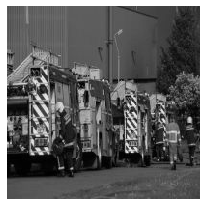

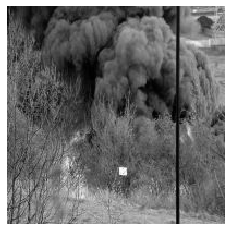

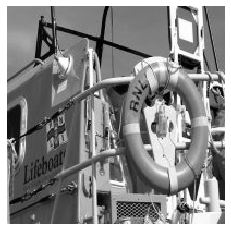

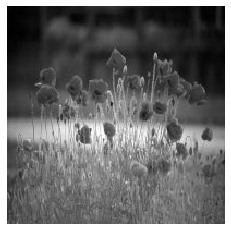

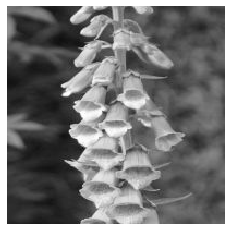

In [18]:
display_images(converted_test_images)

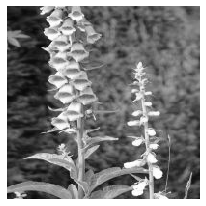

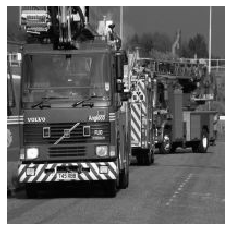

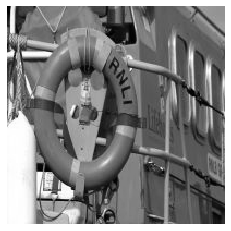

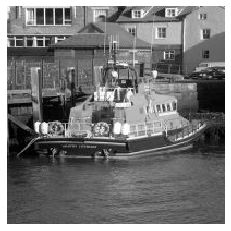

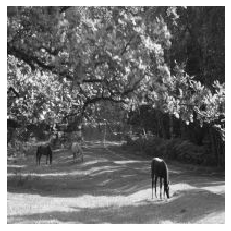

In [19]:
display_images(converted_ref_images)

In [20]:
texture = mt.features.haralick(converted_ref_images[0])

In [21]:
print(texture)

[[ 1.94433537e-04  3.53596608e+02  9.40971968e-01  2.99515835e+03
   1.46948700e-01  2.14260528e+02  1.16270368e+04  8.65662815e+00
   1.29639746e+01  2.01832014e-04  4.79344932e+00 -3.09821040e-01
   9.95676754e-01]
 [ 1.29165245e-04  7.16596475e+02  8.80355191e-01  2.99468269e+03
   9.24728445e-02  2.14298048e+02  1.12621343e+04  8.64478794e+00
   1.34962967e+01  1.22423818e-04  5.41736378e+00 -2.40355561e-01
   9.87397146e-01]
 [ 1.54901391e-04  4.87666432e+02  9.18542882e-01  2.99339360e+03
   1.10078474e-01  2.13913317e+02  1.14859080e+04  8.65136201e+00
   1.32579614e+01  1.54198328e-04  5.11830701e+00 -2.71259402e-01
   9.92170682e-01]
 [ 1.27880045e-04  6.88858438e+02  8.84981945e-01  2.99456654e+03
   9.23121910e-02  2.14300674e+02  1.12894077e+04  8.64450535e+00
   1.34932612e+01  1.23229768e-04  5.39915297e+00 -2.40745391e-01
   9.87472605e-01]]


In [22]:
ht_mean = texture.mean(axis = 0)
print(texture)

[[ 1.94433537e-04  3.53596608e+02  9.40971968e-01  2.99515835e+03
   1.46948700e-01  2.14260528e+02  1.16270368e+04  8.65662815e+00
   1.29639746e+01  2.01832014e-04  4.79344932e+00 -3.09821040e-01
   9.95676754e-01]
 [ 1.29165245e-04  7.16596475e+02  8.80355191e-01  2.99468269e+03
   9.24728445e-02  2.14298048e+02  1.12621343e+04  8.64478794e+00
   1.34962967e+01  1.22423818e-04  5.41736378e+00 -2.40355561e-01
   9.87397146e-01]
 [ 1.54901391e-04  4.87666432e+02  9.18542882e-01  2.99339360e+03
   1.10078474e-01  2.13913317e+02  1.14859080e+04  8.65136201e+00
   1.32579614e+01  1.54198328e-04  5.11830701e+00 -2.71259402e-01
   9.92170682e-01]
 [ 1.27880045e-04  6.88858438e+02  8.84981945e-01  2.99456654e+03
   9.23121910e-02  2.14300674e+02  1.12894077e+04  8.64450535e+00
   1.34932612e+01  1.23229768e-04  5.39915297e+00 -2.40745391e-01
   9.87472605e-01]]


In [23]:
def dist(param1, param2):
    return abs(param1 - param2)/param1

In [24]:
print (dist(2, 6))

2.0
